# PIMA INDIAN DIABETES DATABASE

### Importing the necessary packagws

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Reading the dataset

In [2]:
pima_data = pd.read_csv('diabetes.csv')

In [3]:
pima_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking the datatypes of each column

In [4]:
pima_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Displaying basic stats of the dataset

In [5]:
pima_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Histograms before replacement

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F78ED37988>,
      dtype=object)

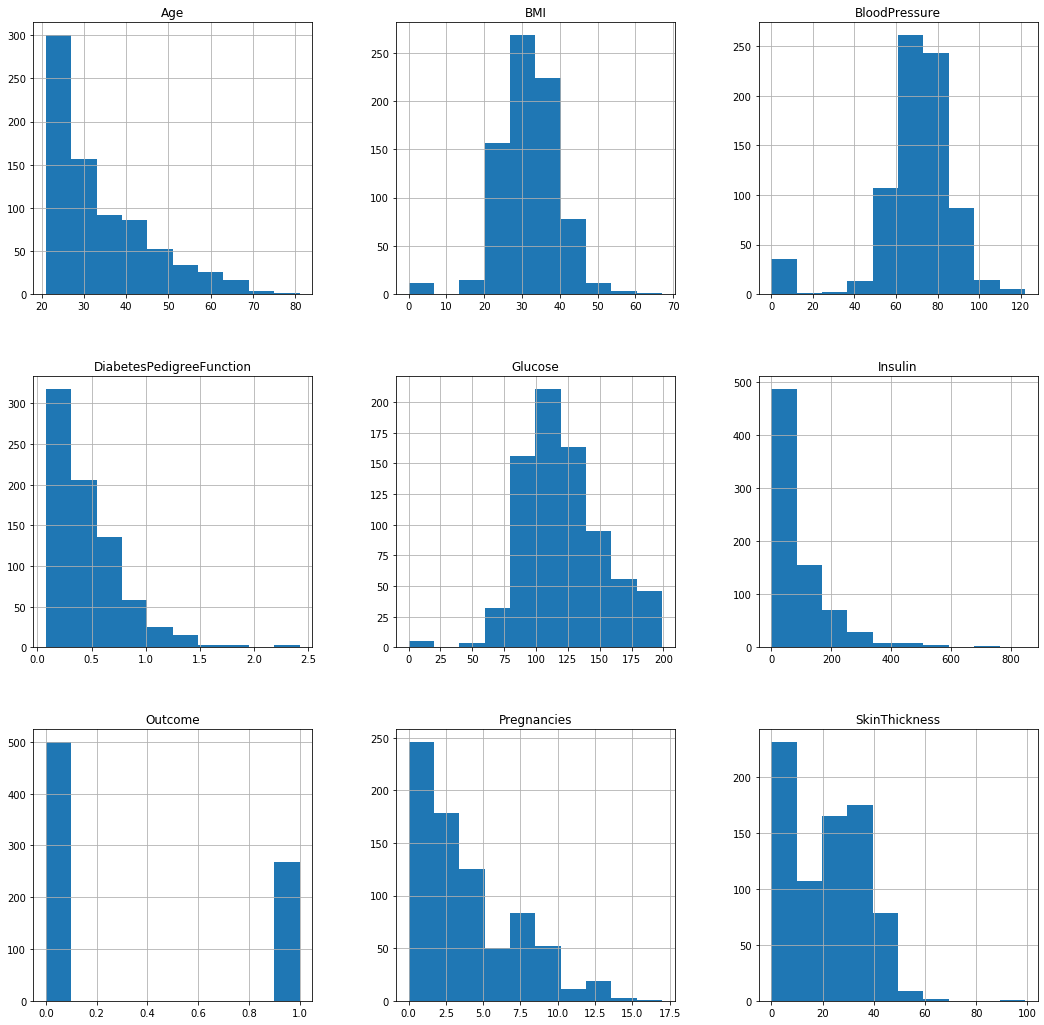

In [6]:
pima_data.hist(figsize = (18,18))

# __The following variables cannot be zero(0)__

* Glucose
* Blood Pressure
* Skin Thickness
* BMI
* Insulin

### Creating a copy of the data

In [7]:
pima_copy=pima_data.copy(deep=True)

### Replacing 0 with NaN

In [8]:
pima_copy[['BMI', 'BloodPressure', 'Glucose', 'SkinThickness', 'Insulin']]= \
pima_copy[['BMI', 'BloodPressure', 'Glucose', 'SkinThickness', 'Insulin']].replace(0, np.nan)

In [9]:
pima_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


### Counting number of null values in each column

In [10]:
pima_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Plotting histograms for all the variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7918C55C8>,
      dtype=object)

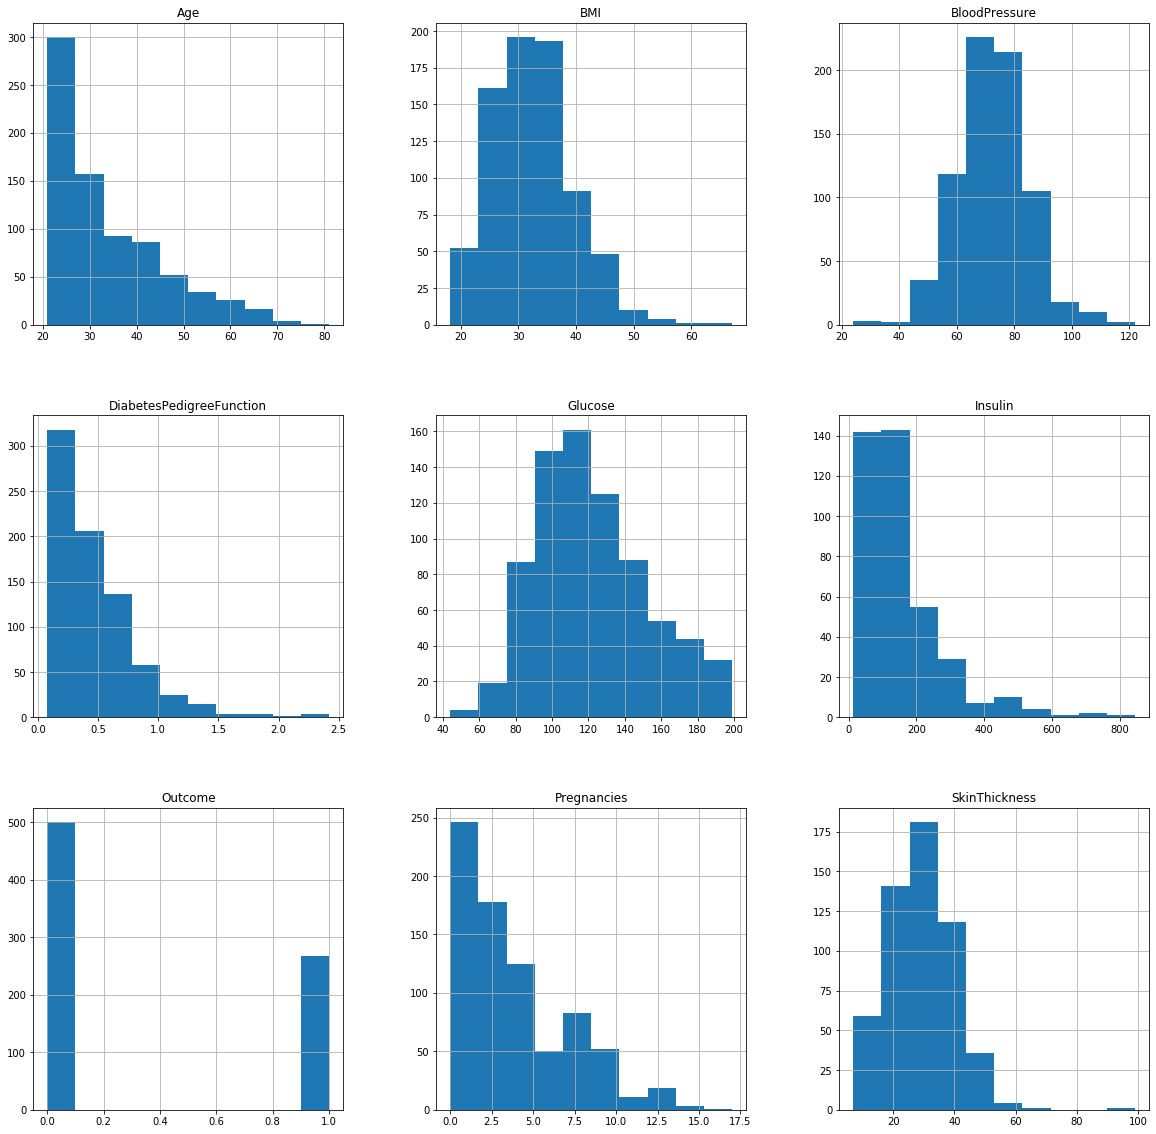

In [11]:
pima_copy.hist(figsize=(20,20))

### Replacing NaN with mean if not skewed, and with median if skewed

In [12]:
pima_copy['BloodPressure'].fillna(pima_copy['BloodPressure'].mean(), inplace=True) ## Use mean becasue data is not skewed
pima_copy['Glucose'].fillna(pima_copy['Glucose'].mean(), inplace=True) ## Use mean becasue data is not skewed
pima_copy['SkinThickness'].fillna(pima_copy['SkinThickness'].median(), inplace=True) ## Replace by median becasue skewed
pima_copy['BMI'].fillna(pima_copy['BMI'].median(), inplace=True) ## ## Replace by median becasue skewed
pima_copy['Insulin'].fillna(pima_copy['Insulin'].median(), inplace=True) ## Replace by median becasue skewed

### Counting number of NaNs in the columns

In [13]:
pima_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Histograms after replacement

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F79187CCC8>,
      dtype=object)

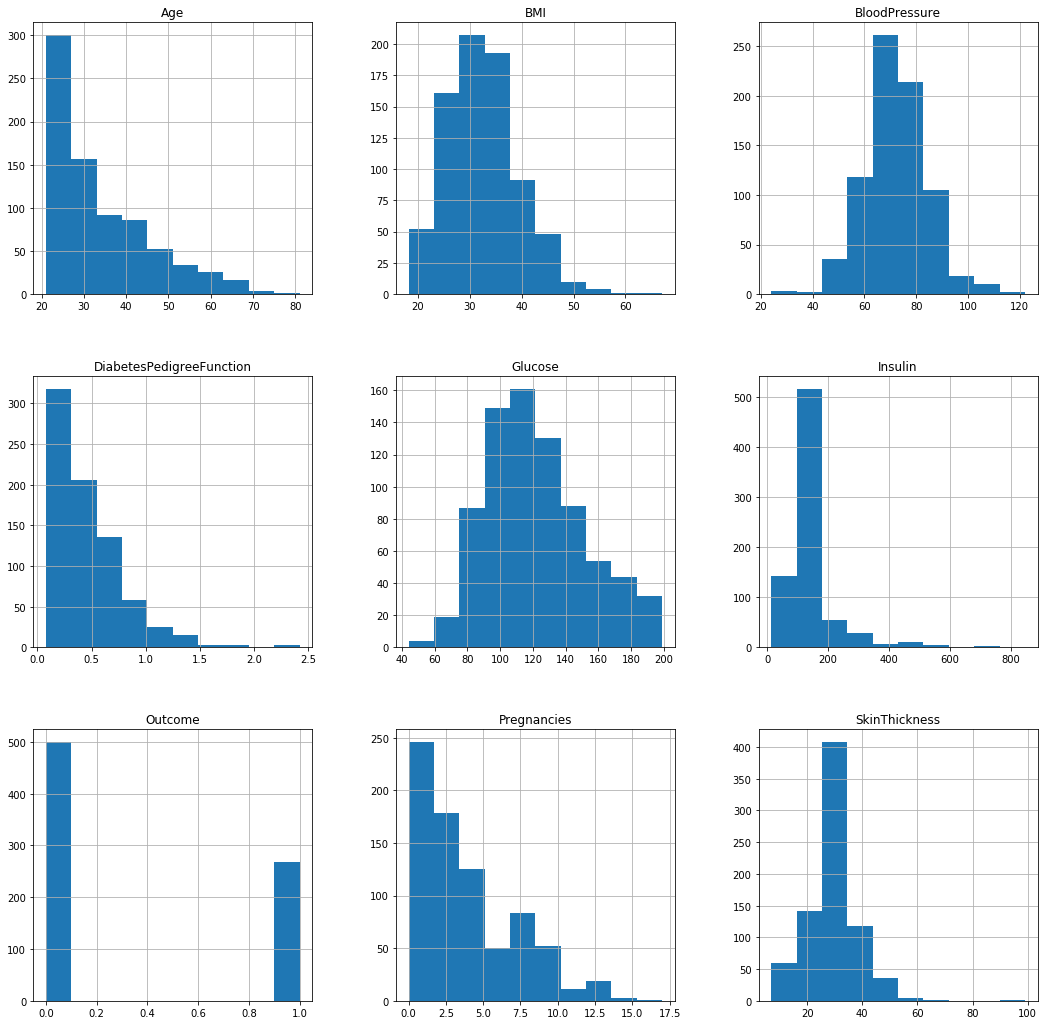

In [14]:
pima_copy.hist(figsize = (18,18))

### Showing the count for the outcomes

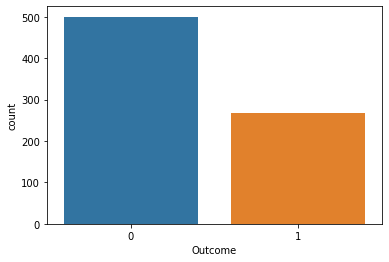

In [15]:
sns.countplot('Outcome', data=pima_data)
plt.show()

In [16]:
pima_copy['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Correlation heatmap before cleaning

In [17]:
correlation_result = pima_data.corr()

(9.0, 0.0)

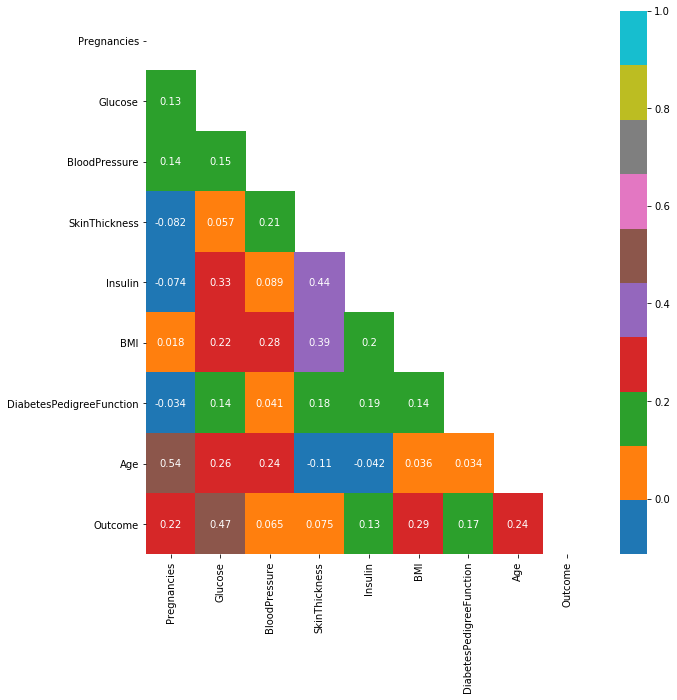

In [18]:
mask = np.zeros_like(correlation_result, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_result, mask=mask, cmap='tab10', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Correlation heatmap after cleaning

In [19]:
correlation_result_clean = pima_copy.corr()

(9.0, 0.0)

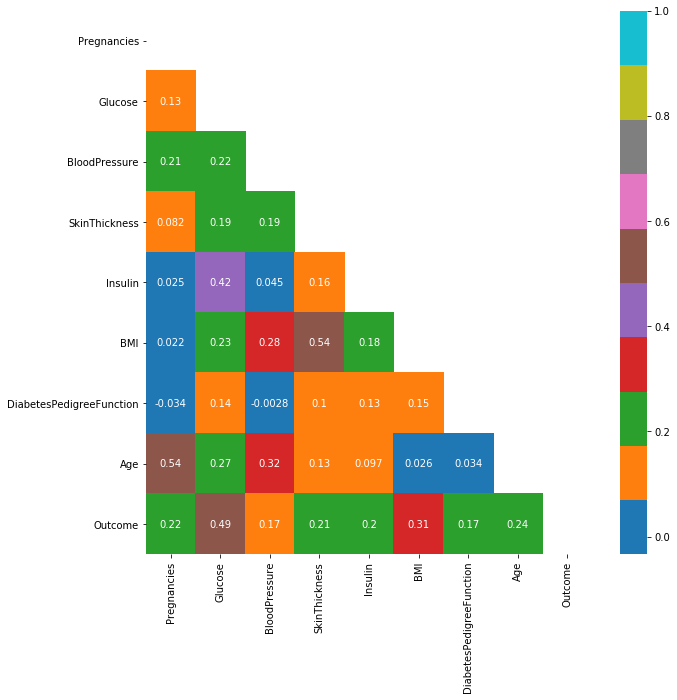

In [20]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation_result_clean, mask=mask, cmap='tab10', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Standardizing the independent variables

In [21]:
indepndentVariables=pima_copy.drop('Outcome', axis=1)

In [22]:
outcome=pima_copy['Outcome']

In [23]:
standardizedIV=preprocessing.scale(indepndentVariables)

## Splitting data into train and test sets

In [24]:
x_train, x_test, y_train, y_test = train_test_split(standardizedIV, outcome, test_size=0.3, random_state=99)

## Logistic Regression

In [25]:
logitModel=LogisticRegression()

In [26]:
logitModel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predicted_result=logitModel.predict(x_test)

In [28]:
print(classification_report(y_test, predicted_result))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       155
           1       0.69      0.62      0.65        76

    accuracy                           0.78       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



#### Precision Score

In [29]:
precision_score(y_test, predicted_result)

0.6911764705882353

#### Recall Score

In [30]:
recall_score(y_test, predicted_result)

0.618421052631579

In [31]:
y_score=logitModel.decision_function(x_test)
average_precision = average_precision_score(y_test, y_score)
average_precision

0.7353130041799979

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.74')

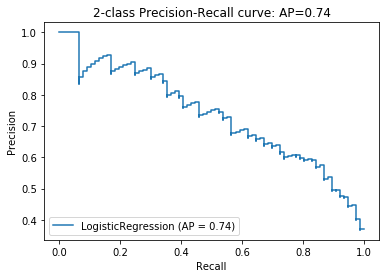

In [32]:
disp = plot_precision_recall_curve(logitModel, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#### The confusion matrix

In [33]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, predicted_result))
conf_mat

,0,1
0,134,21
1,29,47


#### Model accuracy score

In [34]:
accuracy_score(y_test, predicted_result)

0.7835497835497836

#### Cross-validation accuracy score

In [35]:
all_accuracies = cross_val_score(estimator=logitModel, X=standardizedIV, y=outcome, cv=5)
all_accuracies.mean()

0.7708598590951532

#### ROC-AUC Curve

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

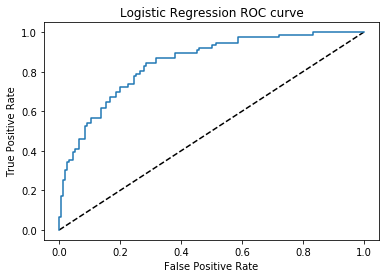

In [37]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

In [38]:
roc_auc_score(y_test,predicted_result)

0.7414685908319185

In [39]:
Scores = ['Precision Score', 
          'Recall Score', 
          'Accuracy Score',
          'ROC AUC Score',
          'True Positives',
          'True Negatives',
          'False Positives',
          'False Negatives'
         ]

In [40]:
LogisticRegressionScores = [precision_score(y_test, predicted_result),
                            recall_score(y_test, predicted_result),
                            accuracy_score(y_test, predicted_result),
                            roc_auc_score(y_test,predicted_result),
                            conf_mat.iloc[1,1],
                            conf_mat.iloc[0,0],
                            conf_mat.iloc[0,1],
                            conf_mat.iloc[1,0]
                           ]

# GridSearch CV for Logistic Regression

In [41]:
parameters_grid = {'C': [0.001,0.01,0.1,1,10,100,1000]}

In [42]:
logit_grid_cv = GridSearchCV(logitModel,parameters_grid,cv=5, scoring= 'roc_auc')
logit_grid_cv.fit(standardizedIV, outcome)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [43]:
logit_grid_cv.best_score_

0.8388022361984626

In [44]:
logit_grid_cv.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### SVM sigmoid

In [45]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
predicted_result = svclassifier.predict(x_test)

In [47]:
print(classification_report(y_test, predicted_result))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       155
           1       0.61      0.61      0.61        76

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



#### Precision Score

In [48]:
precision_score(y_test, predicted_result)

0.6133333333333333

#### Recall Score

In [49]:
recall_score(y_test, predicted_result)

0.6052631578947368

In [50]:
y_score=svclassifier.decision_function(x_test)
average_precision = average_precision_score(y_test, y_score)
average_precision

0.6414290218578201

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.64')

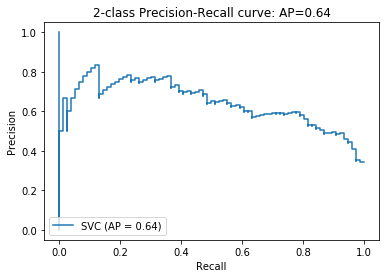

In [51]:
disp = plot_precision_recall_curve(svclassifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#### The confusion matrix

In [52]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, predicted_result))
conf_mat

,0,1
0,126,29
1,30,46


#### Model accuracy score

In [53]:
accuracy_score(y_test, predicted_result)

0.7445887445887446

#### Cross-validation accuracy score

In [54]:
all_accuracies = cross_val_score(estimator=svclassifier, X=standardizedIV, y=outcome, cv=5)
all_accuracies.mean()

0.7122655122655124

#### ROC-AUC Curve

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

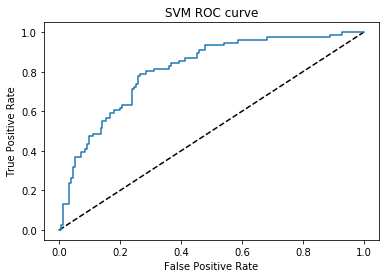

In [56]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC curve')
plt.show()

In [57]:
roc_auc_score(y_test, predicted_result)

0.7090831918505942

In [58]:
SVMScores = [precision_score(y_test, predicted_result),
                            recall_score(y_test, predicted_result),
                            accuracy_score(y_test, predicted_result),
                            roc_auc_score(y_test,predicted_result),
                            conf_mat.iloc[1,1],
                            conf_mat.iloc[0,0],
                            conf_mat.iloc[0,1],
                            conf_mat.iloc[1,0]
                           ]

# GridSearch CV for SVM

In [59]:
parameters_grid = {'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}

In [60]:
svm_classifier = SVC()

In [61]:
svm_grid_cv = GridSearchCV(svm_classifier,parameters_grid,cv=5, scoring= 'roc_auc')
svm_grid_cv.fit(standardizedIV, outcome)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['linear', 'poly', 'sigmoid', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [62]:
svm_grid_cv.best_score_

0.8374220824598183

In [63]:
svm_grid_cv.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
parameters_grid['kernel'][svm_grid_cv.best_index_]

'linear'

## Random Forest Classifier

In [65]:
rf_classifier=RandomForestClassifier()

In [66]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
predicted_result=rf_classifier.predict(x_test)

In [68]:
print(classification_report(y_test, predicted_result))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       155
           1       0.60      0.66      0.63        76

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.75      0.74      0.75       231



#### Precision Score

In [69]:
precision_score(y_test, predicted_result)

0.6024096385542169

#### Recall Score

In [70]:
recall_score(y_test, predicted_result)

0.6578947368421053

In [71]:
y_pred_prob=rf_classifier.predict_proba(x_test)[:,1]
average_precision = average_precision_score(y_test, y_pred_prob)
average_precision

0.72792751345557

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.73')

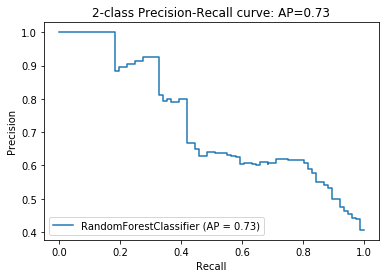

In [72]:
disp = plot_precision_recall_curve(rf_classifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#### The confusion matrix

In [73]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, predicted_result))
conf_mat

,0,1
0,122,33
1,26,50


#### Model accuracy score

In [74]:
accuracy_score(y_test, predicted_result)

0.7445887445887446

#### Cross-validation accuracy score

In [75]:
all_accuracies = cross_val_score(estimator=rf_classifier, X=standardizedIV, y=outcome, cv=5)
all_accuracies.mean()

0.7630421865715984

#### ROC-AUC Curve

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

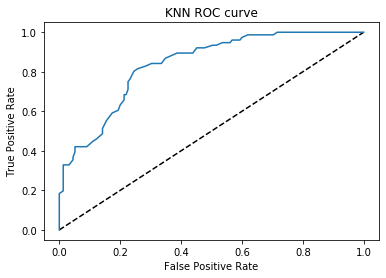

In [77]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC curve')
plt.show()

In [78]:
roc_auc_score(y_test,y_pred_prob)

0.8372665534804754

In [79]:
RFScores = [precision_score(y_test, predicted_result),
                            recall_score(y_test, predicted_result),
                            accuracy_score(y_test, predicted_result),
                            roc_auc_score(y_test,predicted_result),
                            conf_mat.iloc[1,1],
                            conf_mat.iloc[0,0],
                            conf_mat.iloc[0,1],
                            conf_mat.iloc[1,0]
                           ]

# GridSearch CV for Random Forest Classification

In [80]:
parameters_grid = {'n_estimators': [50,100], 
              'class_weight': ['balanced'], 
              'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6]
              }

In [81]:
rf_grid_cv = GridSearchCV(rf_classifier,parameters_grid,cv=5, scoring= 'roc_auc')
rf_grid_cv.fit(standardizedIV, outcome)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [82]:
rf_grid_cv.best_score_

0.844151642208246

In [83]:
rf_grid_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Scores and confusion matrix of the 3 models

In [84]:
ScoresDF = pd.DataFrame([LogisticRegressionScores, SVMScores, RFScores])

In [85]:
ScoresDF.columns=Scores

In [86]:
rowNames = ['Logistic Regression', 'Sigmoid SVM', 'Random Forest Classifier']

In [87]:
ScoresDF.index=rowNames

In [88]:
ScoresDF=ScoresDF.T

In [89]:
ScoresDF

,Logistic Regression,Sigmoid SVM,Random Forest Classifier
Precision Score,0.691176,0.613333,0.602410
Recall Score,0.618421,0.605263,0.657895
Accuracy Score,0.783550,0.744589,0.744589
ROC AUC Score,0.741469,0.709083,0.722496
True Positives,47.000000,46.000000,50.000000
True Negatives,134.000000,126.000000,122.000000
False Positives,21.000000,29.000000,33.000000
False Negatives,29.000000,30.000000,26.000000


# Conclusion

__Logisitic Regression__ has the best scores overall with:
    - Precision Score: 0.691176
    - Recall Score: 0.648421
    - Accuracy Score: 0.78355
    - ROC AUC Score: 0.741469
    
But, in case of predicting whether a person is at high risk of diabetes or not, false negatives and false positives play a very important role.

False negatives will paint the picture to the patients that they are not at high risk of having diabetes and hence do not need to be cautious, but this can turn out to be very harmful. A high false negative number means more people will think they are not at risk even though they are, and that is not desirable.

False positives are not harmful if no medicinal intervention is being administered. If medical intervention takes place and the it does not harm individuals that are not at risk of getting diabetes, then false positives do not account for much, but if they do harm the healthy individuals, a low false positive number is desired.

*If medical intervention affects healthy individuals, then __Logistic Regression__ is the best model to predict becasue it has the smallest total of false positives and false negatives.*

*If medical intervention does not affect healthy individuals, then __Random Forest Classifier__ is the best model to predict becasue it has the smallest false negatives.*